# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [48]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [58]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

# for size in [100, 1000, 10000]:
#     print('SIZE: ', size)
#     print('Timing: ')
#     saved_timing = %timeit -r 5 -n 10 -o func(size)
#     saved_timing.average   # średni czas próby
#     saved_timing.stdev     # odchylenie standardowe
#     print('Memory usage: ')
#     %memit func(size)
#     print('\n')

***Zadanie 1.***
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $

gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$

In [50]:
result = []
for n in range(1,51):
    result.append([])
    for c in [0.1,0.125,0.25,0.33,0.5,0.6]:
        result[-1].append(main.p_diff(n,c))

Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
    - Powinno być zawsze 0
2. Które z liczb mają skończoną a które nieskończoną reprezentację?
    - Skończoną reprezentacje mają te liczby które da się przedstawić jako suma całkowitych potęg liczby 2.
3. Dlaczego wyniki się od siebie różnią?
    - ponieważ obliczenia w których składniki dają się wyrazić za pomocą potęg liczby 2, błąd zaokrągleń nie występuje, a w pozostałych występuje i jest zależny wielkości wartości której dotyczy.
4. Jaki typ błędu tutaj występuje?
    - błąd metody
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  
     - owszem istenieje. Można na przykład zawsze najpierw wykonywać osobno operacja na liczbach mniejszych i większych, skorzystać z modułu do obliczeń symbolicznych np. Sympy, lub modułu decimal

1
powinny być same zera a jest : [8.326672684688674e-17, 0.0, 0.0, 5.551115123125783e-17, 0.0, 1.1102230246251565e-16]
---------------------------------------
2
powinny być same zera a jest : [3.608224830031759e-16, 0.0, 0.0, 5.551115123125783e-17, 0.0, 3.3306690738754696e-16]
---------------------------------------
3
powinny być same zera a jest : [3.608224830031759e-16, 0.0, 0.0, 5.551115123125783e-17, 0.0, 3.3306690738754696e-16]
---------------------------------------
4
powinny być same zera a jest : [1.4155343563970746e-15, 0.0, 0.0, 1.7208456881689926e-15, 0.0, 1.4432899320127035e-15]
---------------------------------------
5
powinny być same zera a jest : [1.4155343563970746e-15, 0.0, 0.0, 1.7208456881689926e-15, 0.0, 1.4432899320127035e-15]
---------------------------------------
6
powinny być same zera a jest : [5.689893001203927e-15, 0.0, 0.0, 1.7208456881689926e-15, 0.0, 5.662137425588298e-15]
---------------------------------------
7
powinny być same zera a jest : [5.689893

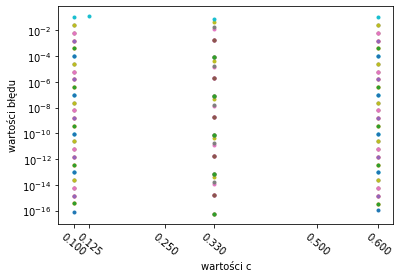

In [51]:
n = 0
for n_res in result:
    n += 1
    print(n)
    print(f'powinny być same zera a jest : {n_res}')
    print('---------------------------------------')
    plt.plot([0.1,0.125,0.25,0.33,0.5,0.6],n_res,'.')

# plt.ylim(bottom = -0.0000000000000000000001)
plt.yscale('log')
plt.xticks([0.1,0.125,0.25,0.33,0.5,0.6],rotation = -40)
plt.xlabel('wartości c')
plt.ylabel('wartości błędu')
plt.show()

Wykres przedstawia wartości błędu (jeżeli jest on różny od 0) dla różnych 'n' w zależności od wartości 'c'.
Widać że dla wartości 1/8, 1/4 oraz 1/2 błędów niema. Wyjątek stanowi błąd o wartości 0.125 dla c = 0.125. Jest on spowodowany tym że wartość 1/8 'nie zmieściła się' w zmiennoprzecinkowej reprezentacji tak dużej liczby jak 2**50 + 1/8.

***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

In [52]:
for i in range(100):
    print(f'wartosc e^30 z dokładnością {i}:', main.exponential(20,i))
print("dokladna wartosc e^30        :", np.exp(20))

wartosc e^30 z dokładnością 0: 1
wartosc e^30 z dokładnością 1: 21.0
wartosc e^30 z dokładnością 2: 221.0
wartosc e^30 z dokładnością 3: 1554.3333333333333
wartosc e^30 z dokładnością 4: 8221.0
wartosc e^30 z dokładnością 5: 34887.66666666667
wartosc e^30 z dokładnością 6: 123776.55555555556
wartosc e^30 z dokładnością 7: 377744.8095238095
wartosc e^30 z dokładnością 8: 1012665.4444444445
wartosc e^30 z dokładnością 9: 2423600.1887125224
wartosc e^30 z dokładnością 10: 5245469.677248677
wartosc e^30 z dokładnością 11: 10376141.474587142
wartosc e^30 z dokładnością 12: 18927261.136817917
wartosc e^30 z dokładnością 13: 32082829.847942185
wartosc e^30 z dokładnością 14: 50876499.43526256
wartosc e^30 z dokładnością 15: 75934725.55168974
wartosc e^30 z dokładnością 16: 107257508.19722371
wartosc e^30 z dokładnością 17: 144107840.7213813
wartosc e^30 z dokładnością 18: 185052654.637112
wartosc e^30 z dokładnością 19: 228152458.75893375
wartosc e^30 z dokładnością 20: 271252262.88075554
war

1. Jaki typ błędu obrazuje omawiany przykład?
    - błąd metody - ponieważ aby otrzymać dokładną wartość $\mathrm{e}^{x}$ trzeba wyknać nieskończenie wiele obliczeń
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

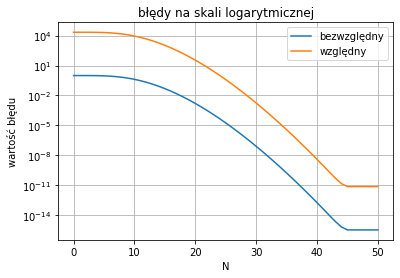

In [53]:
bez = []
wzg = []
e_10 = np.exp(10)
for i in range(51):
    bez.append(main.absolut_error(e_10,main.exponential(10,i)))
    wzg.append(main.relative_error(e_10,main.exponential(10,i)))
plt.plot(wzg)
plt.ylabel("wartość błędu")
plt.plot(bez)
plt.title("błędy na skali logarytmicznej")
plt.xlabel('N')
plt.yscale('log')
plt.legend(['bezwzględny', 'względny'])
plt.grid()
plt.show()

Błędy względny i bezwzględy powoli maleją i dążą do 0 wraz ze wzrostem N co ilustruje powyższy wykres.

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy.
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [54]:
n = 8
for k in range(1,16):
    print(f'------ cos({k} * pi/{n}) = {np.cos(k * np.pi/n)}')
    print("przybliżony coskx1",main.coskx1(k,np.pi/n))
    print("przybliżony coskx2",main.coskx2(k,np.pi/n))
    print()

------ cos(1 * pi/8) = 0.9238795325112867
przybliżony coskx1 0.9238795325112867
przybliżony coskx2 (0.9238795325112867, 0.3826834323650898)

------ cos(2 * pi/8) = 0.7071067811865476
przybliżony coskx1 0.7071067811865475
przybliżony coskx2 (0.7071067811865475, 0.7071067811865476)

------ cos(3 * pi/8) = 0.38268343236508984
przybliżony coskx1 0.3826834323650896
przybliżony coskx2 (0.38268343236508967, 0.9238795325112867)

------ cos(4 * pi/8) = 6.123233995736766e-17
przybliżony coskx1 -2.220446049250313e-16
przybliżony coskx2 (-1.1102230246251565e-16, 1.0)

------ cos(5 * pi/8) = -0.3826834323650897
przybliżony coskx1 -0.38268343236509
przybliżony coskx2 (-0.3826834323650899, 0.9238795325112867)

------ cos(6 * pi/8) = -0.7071067811865475
przybliżony coskx1 -0.7071067811865477
przybliżony coskx2 (-0.7071067811865477, 0.7071067811865475)

------ cos(7 * pi/8) = -0.9238795325112867
przybliżony coskx1 -0.9238795325112867
przybliżony coskx2 (-0.9238795325112868, 0.3826834323650896)

------ 

Wyniki są bardzo dokładne ale dla dużych k obliczenia trwają bardzo długo.

***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia?
     - Z błędami metody - trzeba wykonać nieskończnie wiele obliczeń aby otrzymać poprawną wartość
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

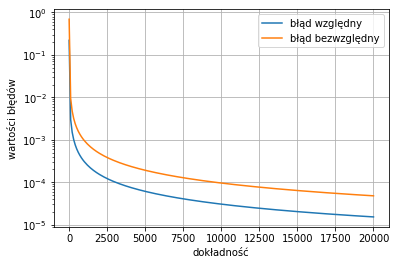

In [59]:
pis = []
bez = []
wzg = []
x = []
for k in range(1,20002,100):
    x.append(k)
    bez.append(main.absolut_error(np.pi,main.pi(k)))
    wzg.append(main.relative_error(np.pi,main.pi(k)))
plt.plot(x, wzg)
plt.plot(x,bez)
plt.yscale('log')
plt.ylabel('wartości błędów')
plt.xlabel('dokładność')
plt.legend(['błąd względny','błąd bezwzględny'])
plt.grid()
plt.show()

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 5 w zalożności od różnych wartości $n$.
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

In [86]:
import memory_profiler
times = []
stds = []
ns = []
pi_errs = []
for n in range(5,2001,20):
    ns.append(n)
    pi_errs.append(main.absolut_error(np.pi,main.pi(n)))
    time =  %timeit -r 5 -n 20 -o main.pi(n)
    times.append(time.average)
    stds.append(time.stdev)
print('Zużycie pamięci dla n = 2000')
%memit main.pi(n)

2.01 µs ± 180 ns per loop (mean ± std. dev. of 5 runs, 20 loops each)
5.72 µs ± 140 ns per loop (mean ± std. dev. of 5 runs, 20 loops each)
10.8 µs ± 2.72 µs per loop (mean ± std. dev. of 5 runs, 20 loops each)
13.8 µs ± 608 ns per loop (mean ± std. dev. of 5 runs, 20 loops each)
16.3 µs ± 160 ns per loop (mean ± std. dev. of 5 runs, 20 loops each)
22.5 µs ± 3.59 µs per loop (mean ± std. dev. of 5 runs, 20 loops each)
25.3 µs ± 2.61 µs per loop (mean ± std. dev. of 5 runs, 20 loops each)
27.4 µs ± 477 ns per loop (mean ± std. dev. of 5 runs, 20 loops each)
32.8 µs ± 976 ns per loop (mean ± std. dev. of 5 runs, 20 loops each)
52.3 µs ± 12.8 µs per loop (mean ± std. dev. of 5 runs, 20 loops each)
37.7 µs ± 340 ns per loop (mean ± std. dev. of 5 runs, 20 loops each)
41.1 µs ± 145 ns per loop (mean ± std. dev. of 5 runs, 20 loops each)
46.9 µs ± 4.33 µs per loop (mean ± std. dev. of 5 runs, 20 loops each)
47.6 µs ± 738 ns per loop (mean ± std. dev. of 5 runs, 20 loops each)
52 µs ± 1.44 µs

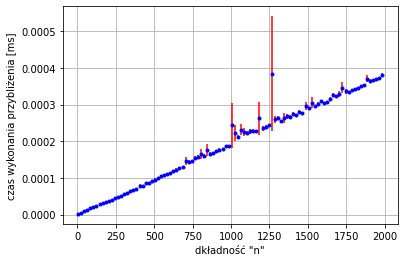

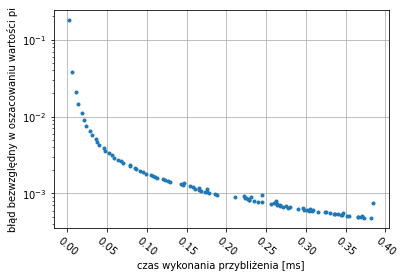

In [83]:
plt.errorbar(ns,times,fmt='.b',yerr=stds,ecolor='r')
# plt.yscale('log')
plt.xlabel('dkładność "n"')
plt.ylabel('czas wykonania przybliżenia [ms]')
plt.grid()
plt.show()
plt.figure()
times = list(map(lambda x: x * 1000,times))
plt.plot(times,pi_errs,'.')
plt.yscale('log')
plt.grid()
plt.xlabel('czas wykonania przybliżenia [ms]')
plt.xticks(rotation = -40)
plt.ylabel('błąd bezwzględny w oszacowaniu wartości pi')
plt.show()
